In [3]:
# CHARGEMENT DES DONNEES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Charger les données depuis un fichier CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = pd.read_csv(url, header=None)



# Séparer les caractéristiques et les étiquettes
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Nombre de caractéristiques
num_echantillons = X.shape[0]
print(f"Nombre d'échantillons : {num_echantillons}")
num_features = X.shape[1]
print(f"Nombre de caractéristiques (features) : {num_features}")


Nombre d'échantillons : 208
Nombre de caractéristiques (features) : 60


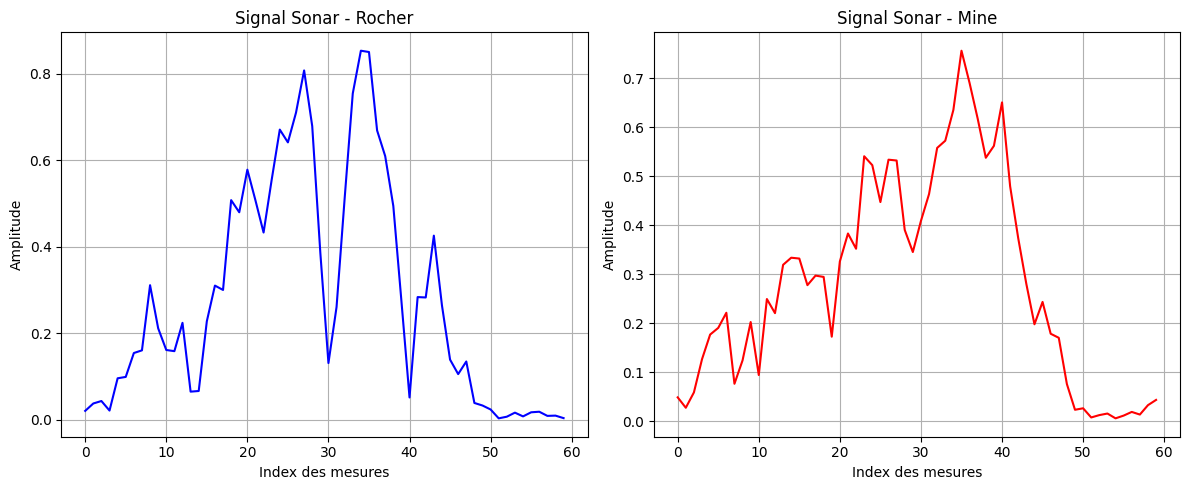

In [ ]:
# AFFICHAGE DE RESULTATS BRUTES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger le dataset Sonar
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = pd.read_csv(url, header=None)

# Séparer les caractéristiques et les étiquettes
X = data.iloc[:, :-1].values  # Les 60 caractéristiques
y = data.iloc[:, -1].values   # Les étiquettes "R" (rock) et "M" (mine)

# Trouver un exemple de rocher et un exemple de mine
rock_sample = X[np.where(y == "R")[0][0]]  # Premier échantillon de type "R"
mine_sample = X[np.where(y == "M")[0][0]]  # Premier échantillon de type "M"

# Générer un axe des indices (de 0 à 59, correspondant aux 60 mesures du sonar)
time_steps = np.arange(len(rock_sample))

# Affichage des signaux bruts
plt.figure(figsize=(12, 5))

# Signal du rocher
plt.subplot(1, 2, 1)
plt.plot(time_steps, rock_sample, label="Rock", color='blue')
plt.title("Signal Sonar - Rocher")
plt.xlabel("Index des mesures")
plt.ylabel("Amplitude")
plt.grid()

# Signal de la mine
plt.subplot(1, 2, 2)
plt.plot(time_steps, mine_sample, label="Mine", color='red')
plt.title("Signal Sonar - Mine")
plt.xlabel("Index des mesures")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


In [2]:
# Encoder les étiquettes
encoder = LabelEncoder()
y = encoder.fit_transform(y)

NameError: name 'LabelEncoder' is not defined

In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Liste des GPU disponibles :", tf.config.list_physical_devices('GPU'))


Num GPUs Available:  0
Liste des GPU disponibles : []


In [17]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Liste des GPU disponibles :", tf.config.list_physical_devices('GPU'))


Num GPUs Available:  0
Liste des GPU disponibles : []


In [13]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')


In [24]:
# ENTRAINEMENT DU MODELE
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Construire le modèle
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=75, batch_size=16, validation_split=0.2)


# Sauvegarder le modèle entraîné
model.save("mon_modele.h5")

print("Modèle entraîné et sauvegardé sous 'mon_modele.h5'")

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Précision sur les données de test : {accuracy * 100:.2f}%')


Epoch 1/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5272 - loss: 0.6846 - val_accuracy: 0.6176 - val_loss: 0.6871
Epoch 2/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7537 - loss: 0.6607 - val_accuracy: 0.6176 - val_loss: 0.6717
Epoch 3/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7198 - loss: 0.6472 - val_accuracy: 0.5588 - val_loss: 0.6730
Epoch 4/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7315 - loss: 0.6329 - val_accuracy: 0.6176 - val_loss: 0.6581
Epoch 5/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7243 - loss: 0.6229 - val_accuracy: 0.6176 - val_loss: 0.6585
Epoch 6/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7785 - loss: 0.5870 - val_accuracy: 0.6471 - val_loss: 0.6328
Epoch 7/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8151 - loss: 0.5631 - val_accuracy: 0.6176 - val_loss: 0.6367
Epoch 8/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7798 - loss: 0.5525 - val_accuracy: 0.7059 - val_loss: 0.6083
Epoch 9

Modèle entraîné et sauvegardé sous 'mon_modele.h5'
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8105 - loss: 0.5865 
Précision sur les données de test : 80.95%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


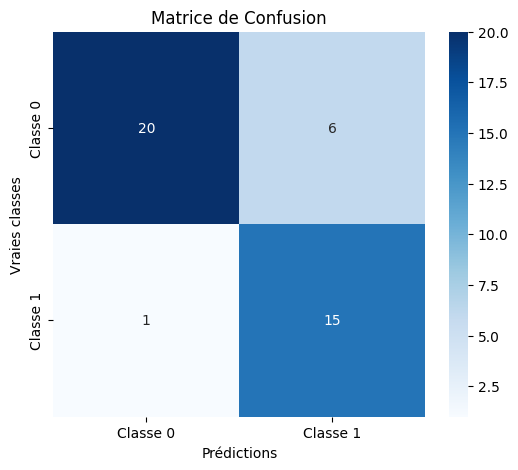

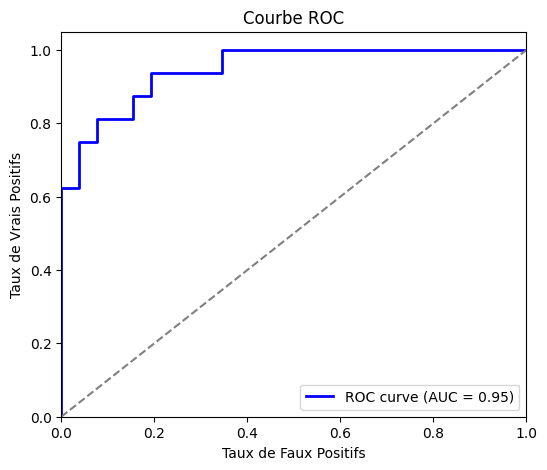

In [7]:
# AFFICHAGE DE LA MATRICE DE CONFUSION ET DE LA COURBE ROC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Faire des prédictions sur X_test
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Convertir en classes binaires

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Afficher la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Afficher l'historique de l'entraînement (si `model.fit()` a retourné un objet `history`)
if 'history' in locals():
    history = history.history  # Récupérer l'historique
    epochs = range(len(history['loss']))

    # Tracer la courbe de perte
    plt.figure(figsize=(6, 5))
    plt.plot(epochs, history['loss'], label='Perte entraînement')
    plt.plot(epochs, history['val_loss'], label='Perte validation')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.title('Évolution de la Perte')
    plt.legend()
    plt.show()

    # Tracer la courbe de précision
    plt.figure(figsize=(6, 5))
    plt.plot(epochs, history['accuracy'], label='Précision entraînement')
    plt.plot(epochs, history['val_accuracy'], label='Précision validation')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.title('Évolution de la Précision')
    plt.legend()
    plt.show()


In [8]:
# GENERATION DE LA DONNEES POUR LE PROGRAMME C
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Charger les données depuis un fichier CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = pd.read_csv(url, header=None)



# Séparer les caractéristiques et les étiquettes
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Nombre de caractéristiques
# num_echantillons = X.shape[0]
# print(f"Nombre d'échantillons : {num_echantillons}")
# num_features = X.shape[1]
# print(f"Nombre de caractéristiques (features) : {num_features}")

# Convertir en C
X_test_c = ', '.join(map(str, X.flatten()))
y_test_c = ', '.join(map(str, y))
# Remplacer R -> 0, M -> 1
y_numeric = np.array([0 if label == 'R' else 1 for label in y])


print(f"float X_test[{X.size}] = {{ {X_test_c} }};")
print(f"int y_test[{y.size}] = {{ {y_numeric} }};")

float X_test[12480] = { 0.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066, 0.2273, 0.31, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555, 0.6711, 0.6415, 0.7104, 0.808, 0.6791, 0.3857, 0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744, 0.051, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.018, 0.0084, 0.009, 0.0032, 0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481, 0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444, 1.0, 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914, 0.325, 0.32, 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947, 0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.184, 0.197, 0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.053, 0.0742, 0.0409, 0.0061, 0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191, 0.014, 0.0049, 0.0052, 0.0044, 0.0262, 0.0582, 0.1099, 0.1083, 0.09

In [25]:
# EXPORT DU MODELE VERS TENSORFLOW LITE
import tensorflow as tf

# Charger le modèle entraîné
model = tf.keras.models.load_model("mon_modele.h5")

# Convertir en TensorFlow Lite en conservant le FLOAT32
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = []  # Pas de quantification
converter.target_spec.supported_types = [tf.float32]  # Forcer le FLOAT32

tflite_model = converter.convert()

# Sauvegarder le modèle converti
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("Modèle converti en TensorFlow Lite en FLOAT32.")


Saved artifact at '/tmp/tmpkp08qlsf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140243932093264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932090384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932091728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932088848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932088272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932091152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932091344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140243932094224: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modèle converti en TensorFlow Lite en FLOAT32.


In [9]:
# Lire le fichier TFLite
with open("model.tflite", "rb") as f:
    tflite_bytes = f.read()

# Convertir en tableau C
hex_array = ', '.join(f'0x{b:02x}' for b in tflite_bytes)
c_code = f"""
unsigned char model_tflite[] = {{
    {hex_array}
}};
unsigned int model_tflite_len = {len(tflite_bytes)};
"""

# Sauvegarder dans un fichier
with open("model_data.cc", "w") as f:
    f.write(c_code)

print("Modèle converti en tableau C et sauvegardé sous 'model_data.cc'")


Modèle converti en tableau C et sauvegardé sous 'model_data.cc'


In [10]:
from google.colab import files

# Télécharger model.tflite
files.download("model.tflite")

# Télécharger model_data.cc
files.download("model_data.cc")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>